In [ ]:
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

from train import main, run_loops_main, run_loops_plot, get_db, get_base_path, OrderedDict, CONFIG, PROBLEM_CONFIG #, Multitask_CONFIG # OPTIM_CONFIG, default_optim, default_problem #, get_steps, get_values,  

In [48]:
#### loading
# import json

In [53]:
loop_params = OrderedDict( 
                    depth = [2,3,4],
                    weight_decay = [0.001] + [0.0001, 0], #[0.0001, 0.001], #,  0.0003],  [ 0, 0.0001,  0.0003] #, 0.001] #, 0.003] #, 0.01,  0.03]
                    wide = [True], # + [False],
                    init_scale = [1], #+ [0.001], # + [1], #[ 0.001], #0.0001,
               )

problem_params = dict(name = 'multi-task',      n_in = 36,   n_feature = 4,  n_sample = 20,  task_factor = 1.25,  n_out = None, )

params = dict(
              problem = problem_params,           # problem='matrix-sensing', 'matrix-completion','multi-task',  
              experiment='test20_optimC_nonormal', 
              n_record = 100,
#     
              # optimizer = 'SGD', 
              optimize_task = True,
              # normalize = True,
              # lr = 0.01, momentum = 0.9,
              # lr = 0.1, momentum = 0,  n_iters = 5000, #2*5000,
              lr = 0.03, momentum = 0,  n_iters = 8000, 
              # lr = 0.005, momentum = 0,  n_iters = 8000,
              clip_val_ = 1e-2,
                )    

config = CONFIG(loop_params=loop_params, **params)  # (problem=problem_params)
log_folder = get_base_path(config)

print(log_folder)

/disk2/Project/DeepMultitask/deep_factor/results/multi-task/test20_optimC_nonormal/n_feature:4|n_in:36|n_out:10|n_sample:20|task_factor:1.25


In [50]:
%tensorboard --logdir $log_folder  --bind_all

Reusing TensorBoard on port 6024 (pid 39835), started 0:36:46 ago. (Use '!kill 39835' to kill it.)

In [51]:
# depth=4; weight_decay=0.0001; wide=True
# model = main(config, depth=depth, weight_decay=weight_decay, wide=wide)


In [55]:
run_loops_main(config)

# for depth in depths:
#     for wd in wds:
#         for wide in widths:
#             main(config, depth=depth, weight_decay=wd, wide=wide) #, **params)

depth2_wd0.001_init_scale1_wide/run1
depth2_wd0.0001_init_scale1_wide/run1
depth2_wd0_init_scale1_wide/run1
depth3_wd0.001_init_scale1_wide/run1
depth3_wd0.0001_init_scale1_wide/run1
depth3_wd0_init_scale1_wide/run1
depth4_wd0.001_init_scale1_wide/run1
depth4_wd0.0001_init_scale1_wide/run1
depth4_wd0_init_scale1_wide/run1


In [62]:
db = None
db = get_db(log_folder, db)

Loading /disk2/Project/DeepMultitask/deep_factor/results/multi-task/test20_optimC_nonormal/n_feature:4|n_in:36|n_out:10|n_sample:20|task_factor:1.25
Loading /disk2/Project/DeepMultitask/deep_factor/results/multi-task/test20_optimC_nonormal/n_feature:4|n_in:36|n_out:10|n_sample:20|task_factor:1.25/depth4_wd0_init_scale1_wide/run1/events.out.tfevents.1644485689.async1.ailab.res.ibm.com.38516.35
Loading /disk2/Project/DeepMultitask/deep_factor/results/multi-task/test20_optimC_nonormal/n_feature:4|n_in:36|n_out:10|n_sample:20|task_factor:1.25/depth4_wd0_init_scale1_wide/run0/events.out.tfevents.1644483425.async1.ailab.res.ibm.com.38516.26
Loading /disk2/Project/DeepMultitask/deep_factor/results/multi-task/test20_optimC_nonormal/n_feature:4|n_in:36|n_out:10|n_sample:20|task_factor:1.25/depth3_wd0.0001_init_scale1_wide/run1/events.out.tfevents.1644485641.async1.ailab.res.ibm.com.38516.31
Loading /disk2/Project/DeepMultitask/deep_factor/results/multi-task/test20_optimC_nonormal/n_feature:4|n_

/disk2/Project/DeepMultitask/deep_factor/results/multi-task/test20_optimC_nonormal/n_feature:4|n_in:36|n_out:10|n_sample:20|task_factor:1.25
OrderedDict([('depth', [2, 3, 4]), ('weight_decay', [0.001, 0.0001, 0]), ('wide', [True]), ('init_scale', [1])])


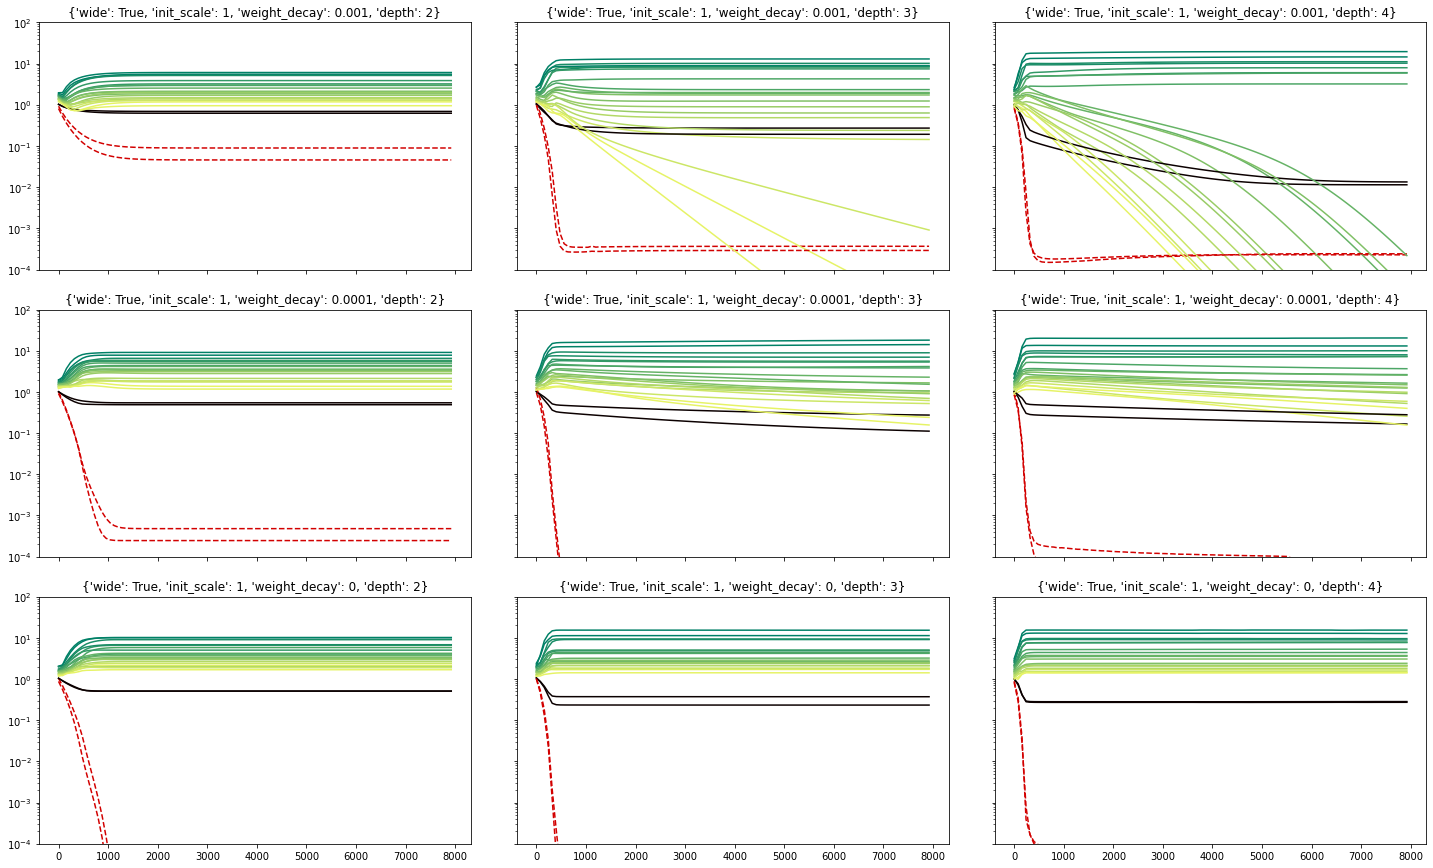

In [65]:
print(log_folder)
print(loop_params)
run_loops_plot(db, loop_params, loss_or_svd=None)